In [1]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

2023-10-04 00:40:09.187754: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = tf.keras.models.load_model("../../checkpoints/saved_model/my_model")
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('dense_4').output)

    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [3]:
def save_vector(images_path):
    
    features = []
    img_paths = []  

    fe = FeatureExtractor()
    images_path = images_path
    folder_list = os.listdir(images_path)

    for foldername in sorted(folder_list):

        try:
            folder_path = os.path.join(images_path, foldername)
            file_list = os.listdir(folder_path)

            for filename in sorted(file_list):
                file_path = os.path.join(folder_path, filename)
                img_paths.append(file_path)

                #Extract Features
                feature = fe.extract(img=Image.open(file_path))
                features.append(feature)

        except Exception as e:
            print('예외가 발생했습니다.', e)

    return features, img_paths

In [ ]:
#이미지 파일 리스트 및 Feature vector 저장

"""
images_path = '../../data/train'
features_matrix, img_maths_list = save_vector(images_path)

feature_matrix_path = "../saved_data/embedding_vector_matrix.npy"
image_list_path = "../saved_data/image_list.npy"

np.save(feature_matrix_path, features_matrix)
np.save(image_list_path, img_maths_list)
"""

In [6]:
#저장되어 있는 Feature vectoer, Image list 불러오기
feature_matrix_path = "../saved_data/embedding_vector_matrix.npy"
image_list_path = "../saved_data/image_list.npy"


saved_features = list(np.load(feature_matrix_path))
saved_image_list = list(np.load(image_list_path))

1/1 [==============================] - 1s 539ms/step
../../data/train/luxury goods/luxury goods_12.jpg
../../data/train/luxury goods/luxury goods_30.jpg
../../data/train/shoes/shoes_47.jpg
../../data/train/shoes/shoes_17.jpg
../../data/train/luxury goods/luxury goods_29.jpg
../../data/train/sports & outdoor products/sports & outdoor products_4.jpg
../../data/train/luxury goods/luxury goods_10.jpg
../../data/train/bags & accessories/bags & accessories_21.jpg
../../data/train/clothing & fashion goods/clothing & fashion goods_38.jpg
../../data/train/sports & outdoor products/sports & outdoor products_30.jpg
../../data/train/sports & outdoor products/sports & outdoor products_28.jpg
../../data/train/sports & outdoor products/sports & outdoor products_35.jpg
../../data/train/sports & outdoor products/sports & outdoor products_16.jpg
../../data/train/sports & outdoor products/sports & outdoor products_21.jpg
../../data/train/luxury goods/luxury goods_1.jpg
../../data/train/small electronics/

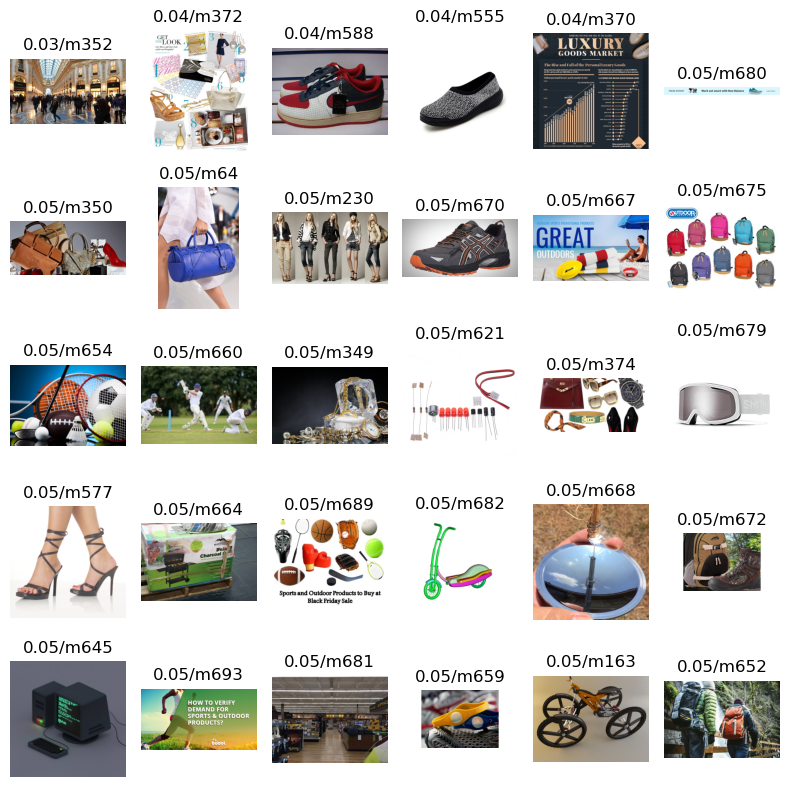

In [7]:
#FeatureExtractor
fe = FeatureExtractor()


# Insert the image query
img = Image.open("../../data/test/luxury_example.jpg")
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(saved_features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], saved_image_list[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    print(score[1])
fig.tight_layout()
plt.show()